In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3


In [36]:
import pandas as pd
import seaborn as sns

file_path = "/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTrain.csv"
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
# Display the first few rows
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: xlabel='humidity', ylabel='meantemp'>

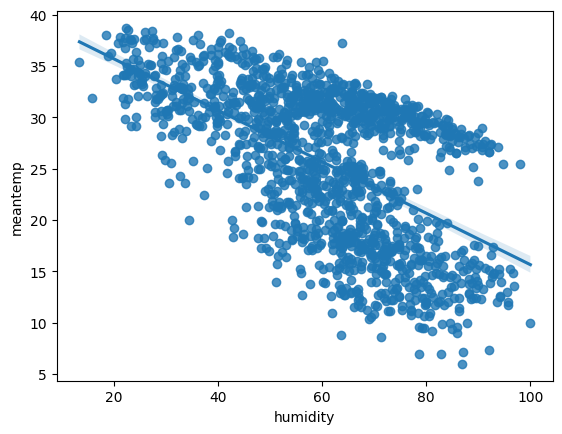

In [37]:
sns.regplot(x=df['humidity'], y=df['meantemp'])

<Axes: xlabel='wind_speed', ylabel='meantemp'>

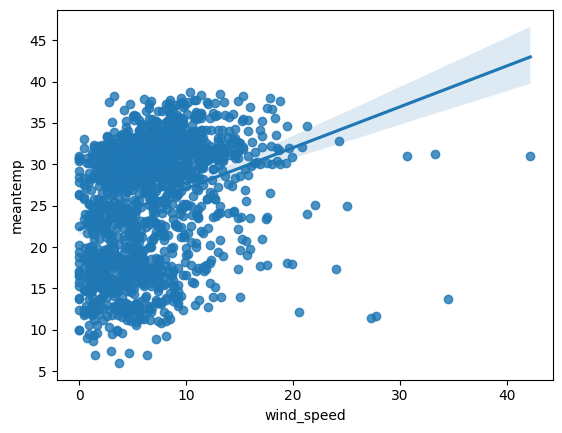

In [38]:
sns.regplot(x=df['wind_speed'], y=df['meantemp'])

<Axes: xlabel='date', ylabel='meantemp'>

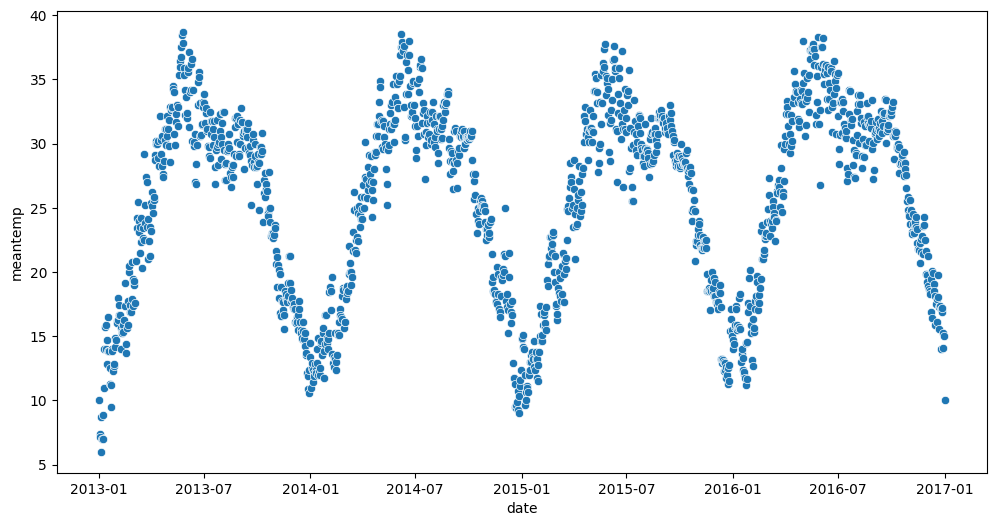

In [40]:
#df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['date'], y=df['meantemp'])

<Axes: xlabel='date', ylabel='humidity'>

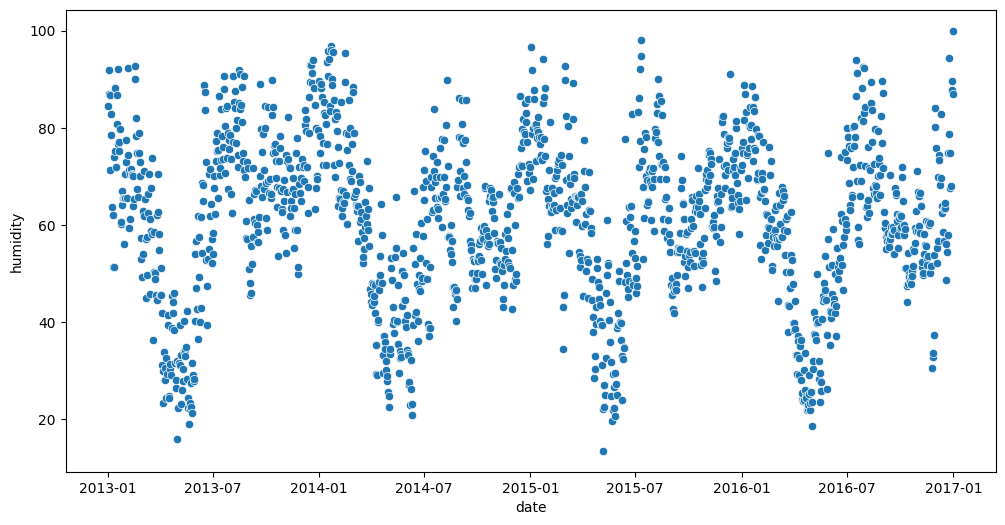

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['date'], y=df['humidity'])

<Axes: xlabel='date', ylabel='wind_speed'>

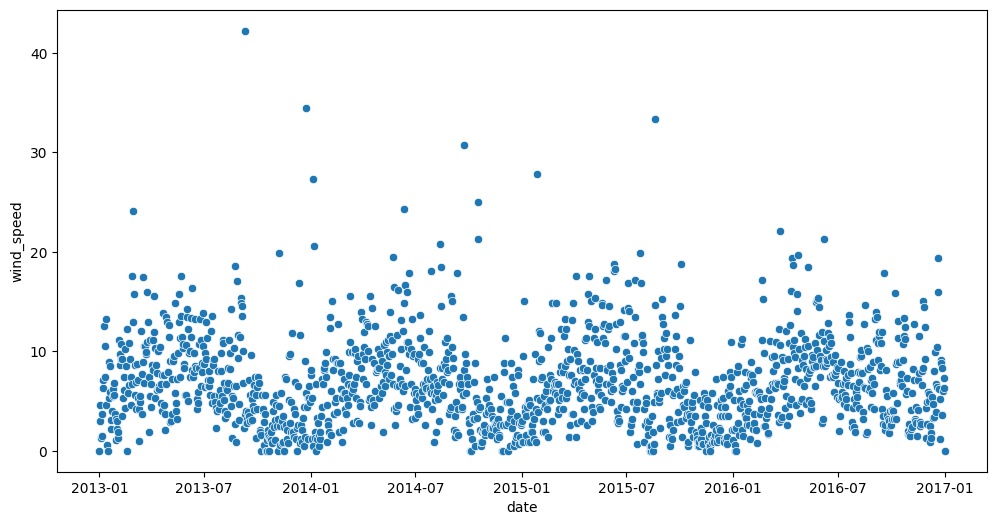

In [42]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['date'], y=df['wind_speed'])

In [43]:
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df["month"] = df["date"].dt.month

<Axes: xlabel='month', ylabel='meantemp'>

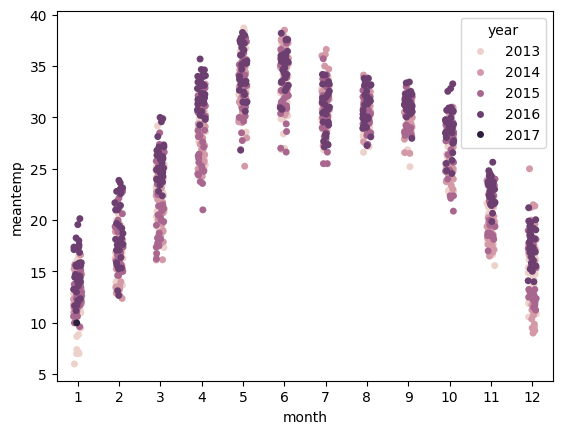

In [46]:
sns.stripplot(x=df['month'], y=df['meantemp'], hue=df['year'])

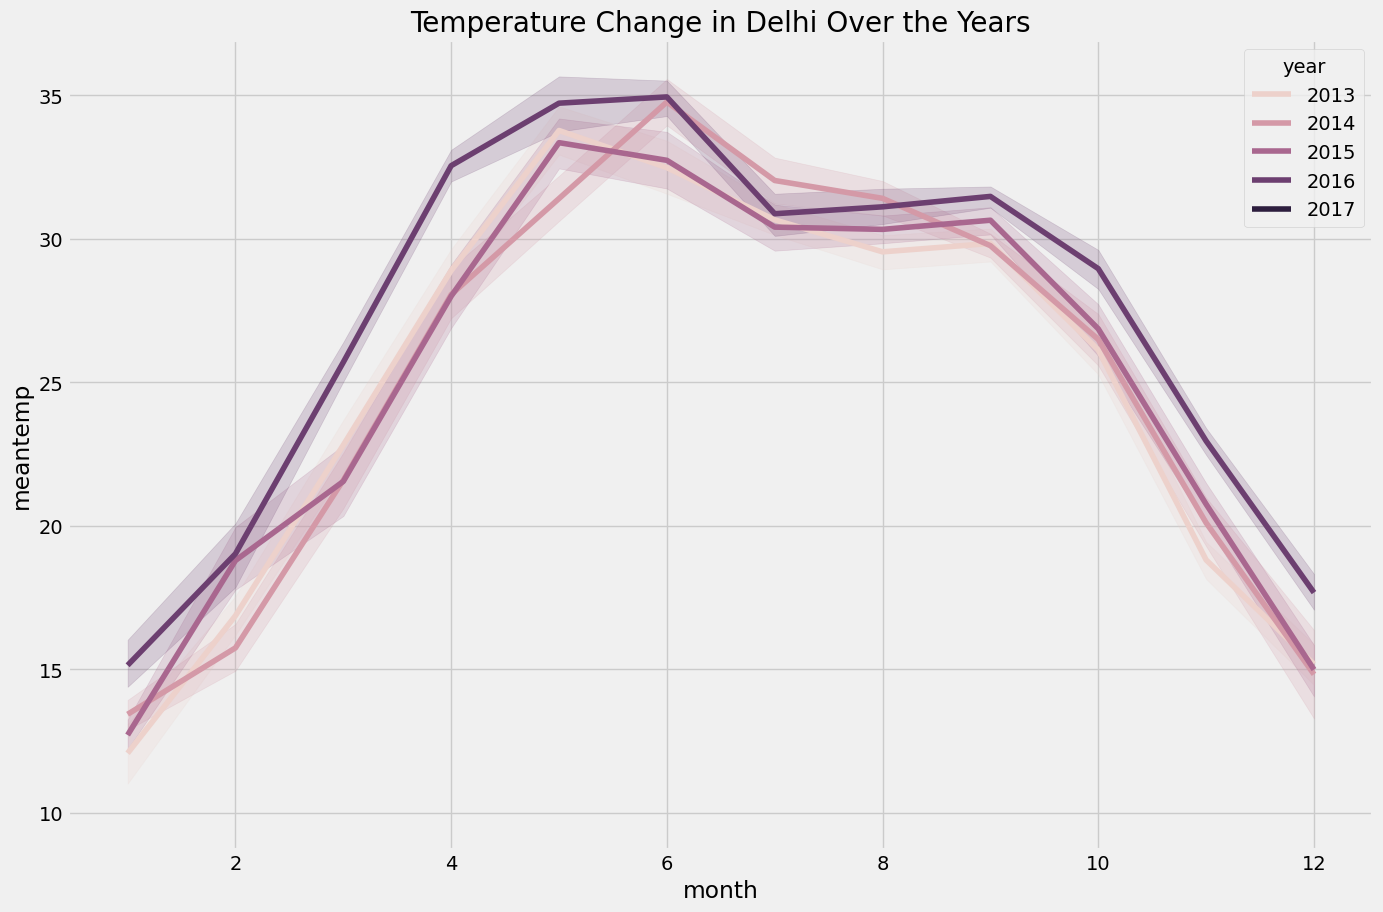

In [49]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = df, x='month', y='meantemp', hue='year')
plt.show()

In [50]:
pip install prophet

In [52]:
forecast_data = df.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
print(forecast_data)

             ds          y    humidity  wind_speed  meanpressure  year  month
0    2013-01-01  10.000000   84.500000    0.000000   1015.666667  2013      1
1    2013-01-02   7.400000   92.000000    2.980000   1017.800000  2013      1
2    2013-01-03   7.166667   87.000000    4.633333   1018.666667  2013      1
3    2013-01-04   8.666667   71.333333    1.233333   1017.166667  2013      1
4    2013-01-05   6.000000   86.833333    3.700000   1016.500000  2013      1
...         ...        ...         ...         ...           ...   ...    ...
1457 2016-12-28  17.217391   68.043478    3.547826   1015.565217  2016     12
1458 2016-12-29  15.238095   87.857143    6.000000   1016.904762  2016     12
1459 2016-12-30  14.095238   89.666667    6.266667   1017.904762  2016     12
1460 2016-12-31  15.052632   87.000000    7.325000   1016.100000  2016     12
1461 2017-01-01  10.000000  100.000000    0.000000   1016.000000  2017      1

[1462 rows x 7 columns]


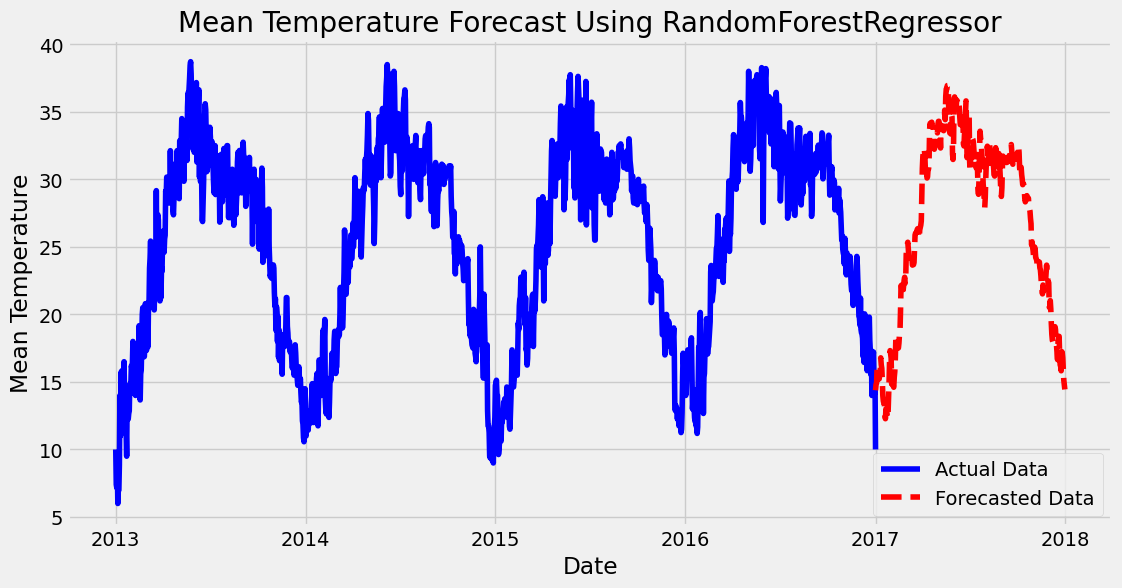

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Rename columns back to original names
forecast_data = forecast_data.rename(columns={'ds': 'date', 'y': 'meantemp'})

# Convert 'date' column to datetime
forecast_data['date'] = pd.to_datetime(forecast_data['date'])

# Create numerical features from the date column
forecast_data['year'] = forecast_data['date'].dt.year
forecast_data['month'] = forecast_data['date'].dt.month
forecast_data['day'] = forecast_data['date'].dt.day
forecast_data['day_of_week'] = forecast_data['date'].dt.dayofweek
forecast_data['day_of_year'] = forecast_data['date'].dt.dayofyear

# Define features (X) and target variable (y)
X = forecast_data[['year', 'month', 'day', 'day_of_week', 'day_of_year']]
y = forecast_data['meantemp']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Create future dates for prediction
future_dates = pd.date_range(start=forecast_data['date'].max(), periods=365, freq='D')
future_df = pd.DataFrame({'date': future_dates})

# Generate time-based features for future predictions
future_df['year'] = future_df['date'].dt.year
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['day_of_year'] = future_df['date'].dt.dayofyear

# Predict future values
future_df['predicted_meantemp'] = model.predict(future_df[['year', 'month', 'day', 'day_of_week', 'day_of_year']])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(forecast_data['date'], forecast_data['meantemp'], label="Actual Data", color='blue')
plt.plot(future_df['date'], future_df['predicted_meantemp'], label="Forecasted Data", color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Forecast Using RandomForestRegressor')
plt.legend()
plt.show()


In [56]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the test dataset
test_data_path = "/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTest.csv"
test_data = pd.read_csv(test_data_path)

# Rename columns to match the original training data
test_data = test_data.rename(columns={'ds': 'date', 'y': 'meantemp'})

# Convert 'date' column to datetime
test_data['date'] = pd.to_datetime(test_data['date'])

# Create time-based features for the test data
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['day_of_week'] = test_data['date'].dt.dayofweek
test_data['day_of_year'] = test_data['date'].dt.dayofyear

# Define features (X) and target variable (y) for test data
X_test = test_data[['year', 'month', 'day', 'day_of_week', 'day_of_year']]
y_test = test_data['meantemp']

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


R-squared score: 0.7851973293108125
Mean Squared Error: 8.612660189319937
Root Mean Squared Error: 2.934733410264029


In [61]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

forecast_data = df.rename(columns = {"date": "ds",
                                       "meantemp": "y"})
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1msd7bg/tgs2t0q_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1msd7bg/8djswrki.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83099', 'data', 'file=/tmp/tmpi1msd7bg/tgs2t0q_.json', 'init=/tmp/tmpi1msd7bg/8djswrki.json', 'output', 'file=/tmp/tmpi1msd7bg/prophet_modelf5k51nq2/prophet_model-20250307221857.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:18:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:18:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1msd7bg/12j5vdx9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi1msd7bg/3i9uvn_l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9207', 'data', 'file=/tmp/tmpi1msd7bg/12j5vdx9.json', 'init=/tmp/tmpi1msd7bg/3i9uvn_l.json', 'output', 'file=/tmp/tmpi1msd7bg/prophet_modelxxyx5mei/prophet_model-20250307222005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


R-squared score: 0.8587890940300023
Mean Squared Error: 5.6619479834373445
Root Mean Squared Error: 2.3794848147103913


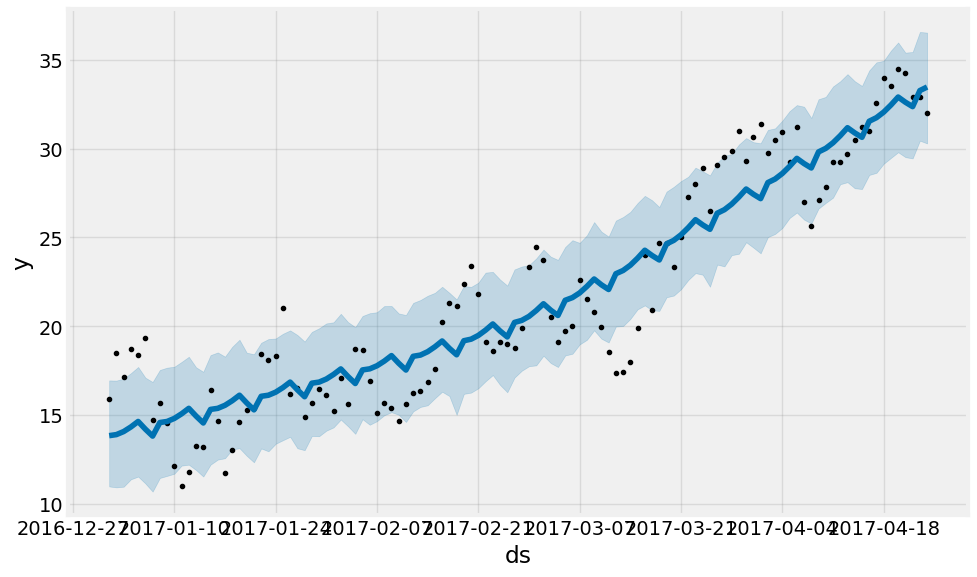

In [63]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the test dataset
test_data_path = "/root/.cache/kagglehub/datasets/sumanthvrao/daily-climate-time-series-data/versions/3/DailyDelhiClimateTest.csv"
test_data = pd.read_csv(test_data_path)

# Rename columns to match Prophet's requirements
test_data = test_data.rename(columns={'ds': 'date', 'y': 'meantemp'})

# Convert 'date' column to datetime
test_data['date'] = pd.to_datetime(test_data['date'])

# Initialize the Prophet model
prophet_model = Prophet()

# Fit the Prophet model on the training data
prophet_model.fit(test_data[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'}))

# Since you're predicting on the same data, no need for periods argument
future = test_data.rename(columns={'date': 'ds', 'meantemp': 'y'})

# Make predictions
forecast = prophet_model.predict(future)

# Plot predictions
prophet_model.plot(forecast)

# Calculate accuracy metrics
y_pred = forecast['yhat']  # predicted values
y_test = test_data['meantemp']  # actual values

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
